In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS_rainfall_prediction_dataset_cleaned.csv to weatherAUS_rainfall_prediction_dataset_cleaned.csv


In [ ]:
data = pd.read_csv('weatherAUS_rainfall_prediction_dataset_cleaned.csv')
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.193993,23.221337,2.360898,5.468995,7.610612,40.035567,14.043384,18.662601,68.880816,51.539143,1017.649946,1015.256314,4.448437,4.509959,16.990624,21.683306
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265605,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.610000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.470000,7.610000,39.000000,13.000000,18.660000,69.000000,51.540000,1017.650000,1015.260000,4.450000,4.510000,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.470000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [ ]:
print(data.isnull().values.any())

False


In [ ]:
print(data.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [ ]:
#data = data.fillna(data.mean(numeric_only=True))
#print(data.isnull().sum())

In [ ]:
features = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'
]
X = data[features]
y = data['RainTomorrow']

In [ ]:
# Bagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
 # Menghitung baseline performance (prediksi kelas mayoritas)
 # Mencari kelas mayoritas
 y_train = y_train.astype(int)
 #konversi nilai data agar dapat dihitung kelas dengan populasi terbanyak
 majority_class = np.bincount(y_train).argmax()
 # Prediksi kelas mayoritas pada testing set
 y_pred_baseline = np.full_like(y_test, majority_class)

# Inisialisasi model
model = DecisionTreeClassifier(random_state=42)
# Latih model menggunakan data latih
model.fit(X_train, y_train)
# Buat prediksi menggunakan data uji
y_pred = model.predict(X_test)

In [ ]:
# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
labels = ['Low', 'Medium', 'High','Very High']

# Menghitung akurasi baseline
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", baseline_accuracy,"\n")
print("Decicion Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision, "\n")

# Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Tampilkan classification report
print(classification_report(y_test, y_pred))

NameError: name 'conf_matrix' is not defined

/tmp/ipython-input-431423570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=data, palette='pastel')


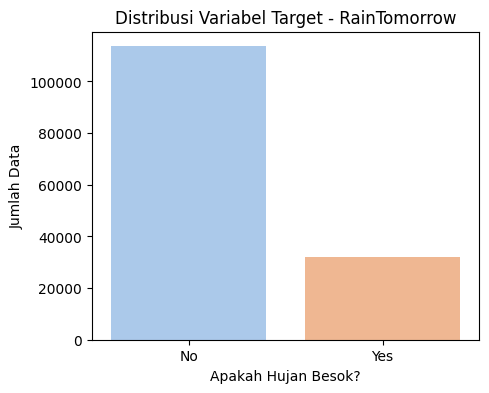

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='RainTomorrow', data=data, palette='pastel')
plt.title("Distribusi Variabel Target - RainTomorrow")
plt.xlabel("Apakah Hujan Besok?")
plt.ylabel("Jumlah Data")
plt.show()

In [ ]:
print("\nStatistik Deskriptif:\n")
print(data.describe())


Statistik Deskriptif:

             MinTemp        MaxTemp       Rainfall    Evaporation  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       12.193993      23.221337       2.360898       5.468995   
std         6.365750       7.088124       8.382488       3.161541   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.700000      18.000000       0.000000       4.000000   
50%        12.100000      22.700000       0.000000       5.470000   
75%        16.800000      28.200000       1.000000       5.470000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        7.610612      40.035567      14.043384      18.662601   
std         2.729486      13.118253       8.861059       8.716581   
min         0.000000       6.000000       0.000000       0.000000   
25%      

Jumlah baris dan kolom: (145460, 23)
             MinTemp        MaxTemp       Rainfall    Evaporation  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean       12.193993      23.221337       2.360898       5.468995   
std         6.365750       7.088124       8.382488       3.161541   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.700000      18.000000       0.000000       4.000000   
50%        12.100000      22.700000       0.000000       5.470000   
75%        16.800000      28.200000       1.000000       5.470000   
max        33.900000      48.100000     371.000000     145.000000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  145460.000000  145460.000000  145460.000000  145460.000000   
mean        7.610612      40.035567      14.043384      18.662601   
std         2.729486      13.118253       8.861059       8.716581   
min         0.000000       6.000000       0.000000       0.000000

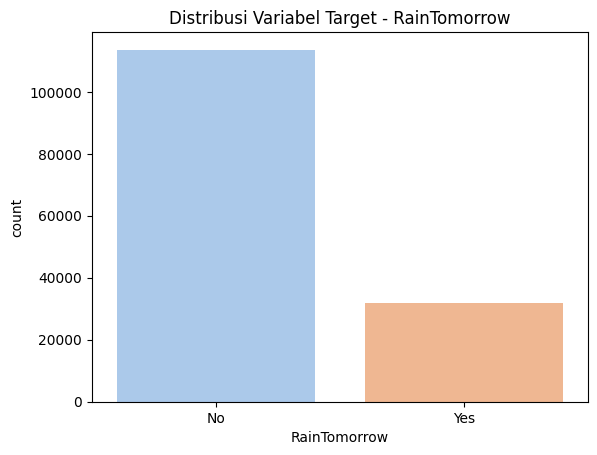

In [ ]:
# Melihat bentuk data dan statistik deskriptif
print("Jumlah baris dan kolom:", data.shape)
print(data.describe())

# Distribusi target
sns.countplot(x='RainTomorrow', data=data, hue='RainTomorrow', palette='pastel', legend=False)
plt.title("Distribusi Variabel Target - RainTomorrow")
plt.show()

In [ ]:
print("Jumlah baris dan kolom:", data.shape)
print("\nTipe data setiap kolom:")
print(data.dtypes)

Jumlah baris dan kolom: (145460, 23)

Tipe data setiap kolom:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [ ]:
# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", data.shape)

# Menghitung jumlah kolom per tipe data
print("Jumlah kolom per tipe data:")
print(data.dtypes.value_counts())

# Menampilkan tipe data setiap kolom
print("Tipe data setiap kolom:")
print(data.dtypes)


Jumlah baris dan kolom: (145460, 23)
Jumlah kolom per tipe data:
float64    16
object      7
Name: count, dtype: int64
Tipe data setiap kolom:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


In [ ]:
 data.info()

In [ ]:
data.describe()

/tmp/ipython-input-3474450371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainTomorrow', data=data, palette='pastel')


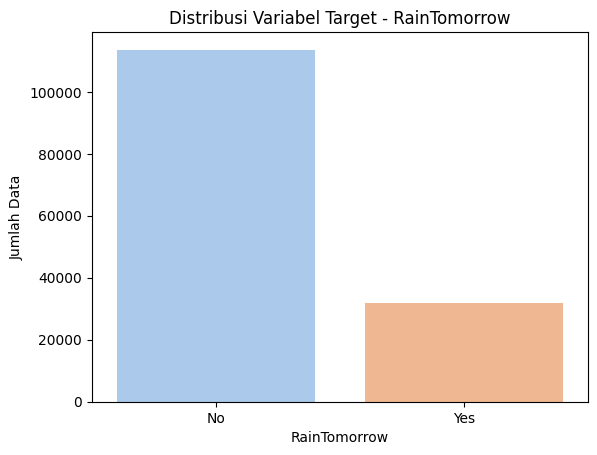

Proporsi tiap kelas RainTomorrow (%):
RainTomorrow
No     78.085384
Yes    21.914616
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")

sns.countplot(x='RainTomorrow', data=data, palette='pastel')
plt.title("Distribusi Variabel Target - RainTomorrow")
plt.xlabel("RainTomorrow")
plt.ylabel("Jumlah Data")
plt.show()

print("Proporsi tiap kelas RainTomorrow (%):")
print(data['RainTomorrow'].value_counts(normalize=True) * 100)

Korelasi Variabel Numerik terhadap RainTomorrow (Encoded):


,RainTomorrow_encoded
RainTomorrow_encoded,1.000000
Humidity3pm,0.433179
Cloud3pm,0.298049
Humidity9am,0.251470
Cloud9am,0.249960
Rainfall,0.233900
WindGustSpeed,0.220443
WindSpeed9am,0.086661
WindSpeed3pm,0.084207
MinTemp,0.082175


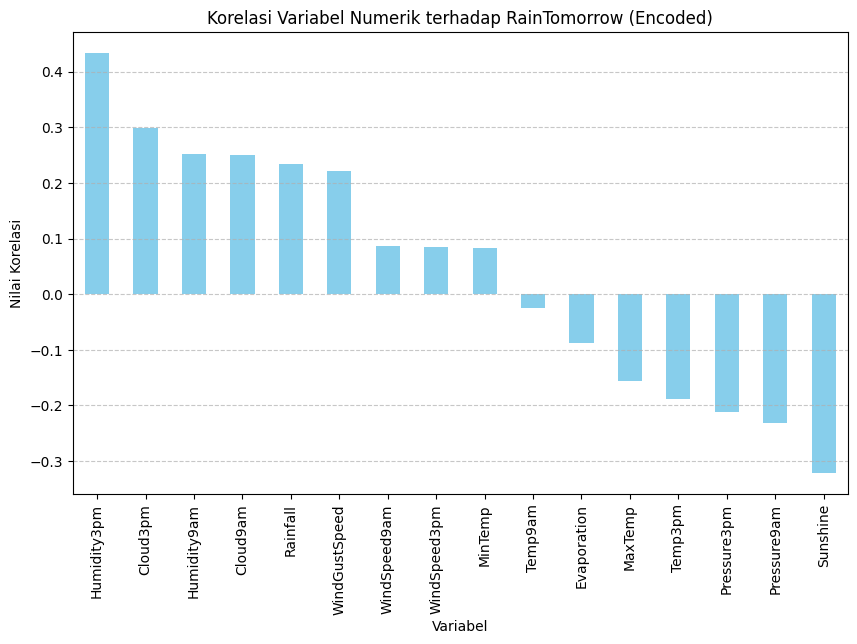

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")

# Convert 'RainTomorrow' to numeric using Label Encoding
le = LabelEncoder()
data['RainTomorrow_encoded'] = le.fit_transform(data['RainTomorrow'])

# Calculate correlation for numeric columns including the encoded target variable
corr_with_target = data.corr(numeric_only=True)['RainTomorrow_encoded'].sort_values(ascending=False)

# Display the correlation with the encoded target variable
print("Korelasi Variabel Numerik terhadap RainTomorrow (Encoded):")
display(corr_with_target)

# Optional: Visualize the correlation with the encoded target variable
plt.figure(figsize=(10,6))
corr_with_target.drop('RainTomorrow_encoded').plot(kind='bar', color='skyblue')
plt.title("Korelasi Variabel Numerik terhadap RainTomorrow (Encoded)")
plt.xlabel("Variabel")
plt.ylabel("Nilai Korelasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import pandas as pd

data = pd.read_csv("weatherAUS_rainfall_prediction_dataset_cleaned.csv")

# Pemeriksaan jumlah missing value per kolom
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values)


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


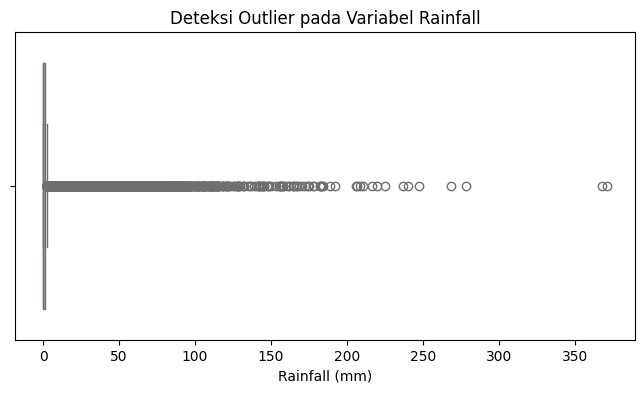

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi outlier pada variabel curah hujan
plt.figure(figsize=(8,4))
sns.boxplot(x=data['Rainfall'], color='skyblue')
plt.title("Deteksi Outlier pada Variabel Rainfall")
plt.xlabel("Rainfall (mm)")
plt.show()


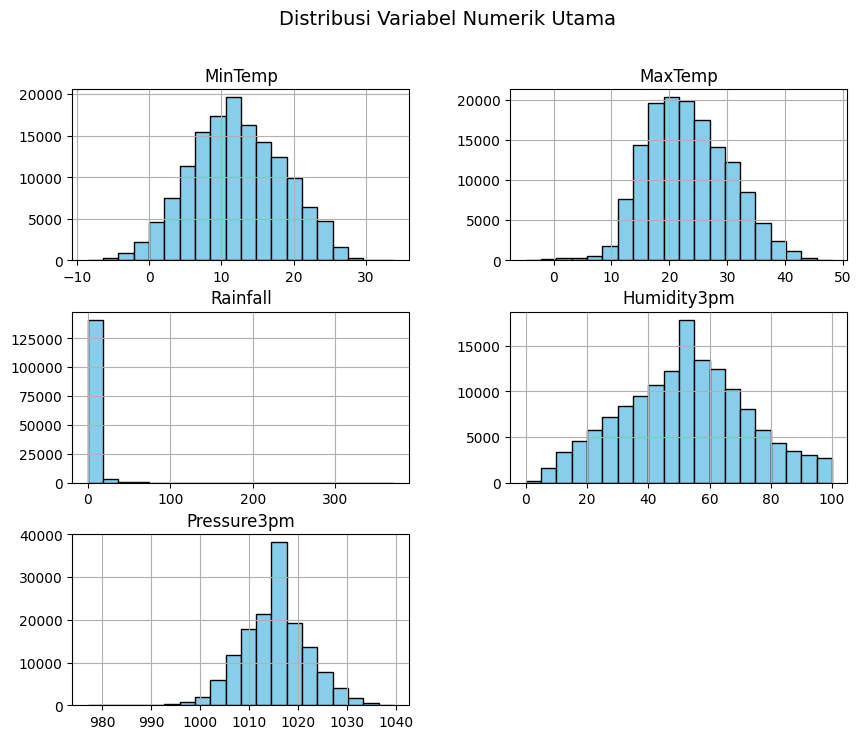

In [ ]:
# Visualisasi distribusi beberapa variabel numerik
data[['MinTemp','MaxTemp','Rainfall','Humidity3pm','Pressure3pm']].hist(
    figsize=(10,8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik Utama", fontsize=14)
plt.show()
